# Chapter 9: Unsupervised Learning Techniques

**Tujuan:** Menjelajahi teknik unsupervised: clustering (K‑Means, DBSCAN), Gaussian Mixtures, anomaly detection, dan association rules brief.

---

## 1. Clustering Overview

- **Clustering:** mengelompokkan data tanpa label  
- Aplikasi: segmentasi pelanggan, deteksi pola, image segmentation  

### 1.1 K‑Means

- Partisi data ke k cluster  
- Iterasi:  
  1. Assign setiap titik ke centroid terdekat  
  2. Update centroid sebagai rata‑rata anggota cluster  
- Sensitif ke inisialisasi & k  

### 1.2 DBSCAN

- Density‑based: cluster = area densitas tinggi  
- Parameter: `eps` (jari‑jari), `min_samples`  
- Menangani noise otomatis  

---

## 2. Gaussian Mixture Models (GMM)

- Model probabilistik: data dihasilkan campuran Gaussian  
- Setiap cluster = Gaussian dengan mean & covarian  
- Cocok untuk cluster berbentuk elips  

---

## 3. Anomaly & Novelty Detection

- **Anomaly Detection:** temukan outliers (contamination)  
- Algoritma: One‑Class SVM, Isolation Forest, EllipticEnvelope  
- **Novelty Detection:** mirip, tapi data training “bersih”

---

## 4. Association Rules (singkat)

- Temukan aturan `X → Y` pada data transaksi  
- Algoritma populer: Apriori, FP‑Growth  
- Metrik: _support_, _confidence_, _lift_  

---

In [1]:
# Setup umum
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

## A. K‑Means Clustering

Contoh pada data blob.

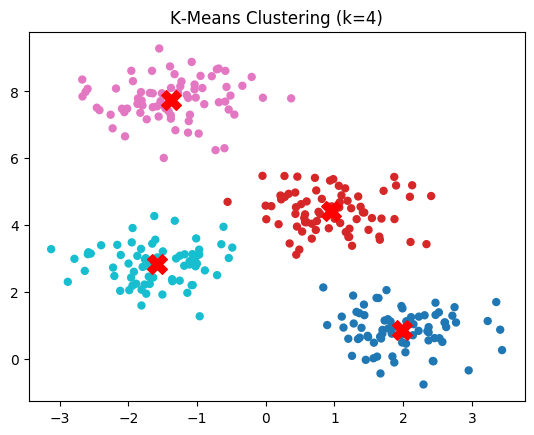

In [2]:
# Data blob
X_blob, y_blob = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# KMeans k=4
kmeans = KMeans(n_clusters=4, random_state=42)
y_km = kmeans.fit_predict(X_blob)

# Plot
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_km, cmap='tab10', s=25)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='X', s=200, c='red')
plt.title("K‑Means Clustering (k=4)")
plt.show()

## B. DBSCAN

Contoh pada data moons + noise.

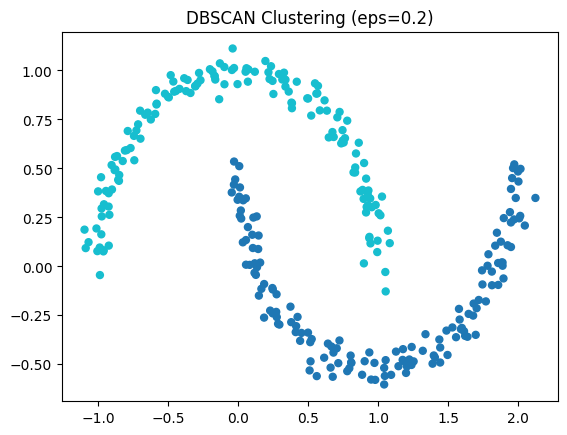

In [3]:
# Data moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=0)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_db = dbscan.fit_predict(X_moons)

# Plot
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_db, cmap='tab10', s=25)
plt.title("DBSCAN Clustering (eps=0.2)")
plt.show()

## C. Gaussian Mixture Models

Clustering berbasis probabilistik.

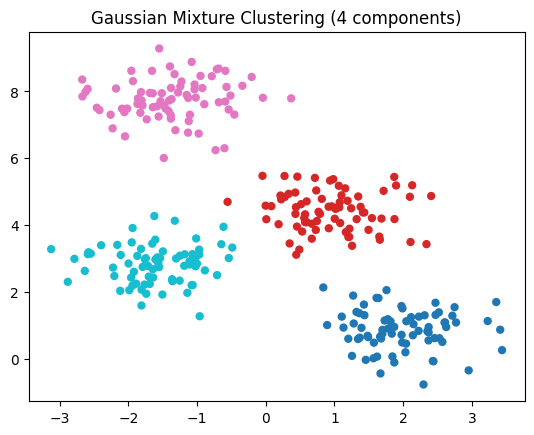

In [4]:
# GMM
gmm = GaussianMixture(n_components=4, random_state=42)
y_gmm = gmm.fit_predict(X_blob)

# Plot
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_gmm, cmap='tab10', s=25)
plt.title("Gaussian Mixture Clustering (4 components)")
plt.show()

## D. Anomaly Detection

Gunakan Isolation Forest dan One‑Class SVM.

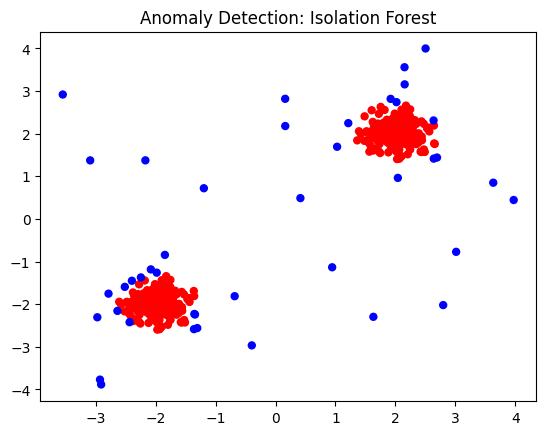

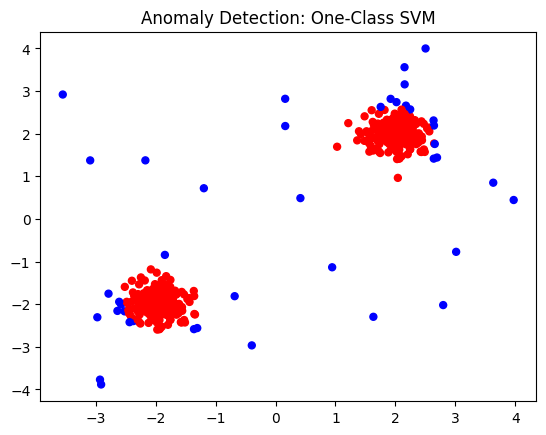

In [5]:
# Data normal + outliers
rng = np.random.RandomState(42)
X_norm = 0.3 * rng.randn(200, 2)
X_out = rng.uniform(low=-4, high=4, size=(20,2))
X_ad = np.r_[X_norm + 2, X_norm - 2, X_out]

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_iso = iso_forest.fit_predict(X_ad)

# One-Class SVM
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
y_oc = oc_svm.fit_predict(X_ad)

# Plot helper
def plot_anomaly(X, y_pred, title):
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='bwr', s=25)
    plt.title(title)
    plt.show()

plot_anomaly(X_ad, y_iso, "Anomaly Detection: Isolation Forest")
plot_anomaly(X_ad, y_oc,  "Anomaly Detection: One‑Class SVM")

## E. Association Rules (illustrasi)

> Untuk studi lanjut, gunakan paket `mlxtend.frequent_patterns`  
> – _Apriori_ untuk _frequent itemsets_, lalu _association_rules_.

---


## Ringkasan Chapter 9

- **Clustering:** K‑Means (fast, but k harus diketahui), DBSCAN (noise & bentuk arbitrary).  
- **GMM:** fleksibel untuk bentuk elips, model probabilistik.  
- **Anomaly Detection:** Isolation Forest & One‑Class SVM.  
- **Association Rules:** temukan pola `X→Y` pada data transaksi.